*In this notebook EDA is perfomed on data present. Problem statement here is to build a model which doesnt overfit given limited train data
Reference : https://towardsdatascience.com/13-key-code-blocks-for-eda-classification-task-94890622be57*

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Read data

In [2]:
df_train=pd.read_csv('/content/drive/MyDrive/CasestudiesAAIC/self case study1/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/CasestudiesAAIC/self case study1/test.csv')

# Exploratory data analysis

In [23]:
df_train.shape

(250, 302)

In [24]:
df_test.shape

(19750, 301)

In [3]:
print("************************Train data sample***************************")
print(df_train.head(5))

************************Train data sample***************************
   id  target      0      1      2      3      4      5      6      7  ...  \
0   0     1.0 -1.067 -1.114 -0.616  0.376  1.090  0.467 -0.422  0.460  ...   
1   1     0.0 -0.831  0.271  1.716  1.096  1.731 -0.197  1.904 -0.265  ...   
2   2     0.0  0.099  1.390 -0.732 -1.065  0.005 -0.081 -1.450  0.317  ...   
3   3     1.0 -0.989 -0.916 -1.343  0.145  0.543  0.636  1.127  0.189  ...   
4   4     0.0  0.811 -1.509  0.522 -0.360 -0.220 -0.959  0.334 -0.566  ...   

     290    291    292    293    294    295    296    297    298    299  
0  0.220 -0.339  0.254 -0.179  0.352  0.125  0.347  0.436  0.958 -0.824  
1 -0.765 -0.735 -1.158  2.554  0.856 -1.506  0.462 -0.029 -1.932 -0.343  
2 -1.311  0.799 -1.001  1.544  0.575 -0.309 -0.339 -0.148 -0.646  0.725  
3 -1.370  1.093  0.596 -0.589 -0.649 -0.163 -0.958 -1.081  0.805  3.401  
4 -0.178  0.718 -1.017  1.249 -0.596 -0.445  1.751  1.442 -0.393 -0.643  

[5 rows x 302 col

In [4]:
print("************************Test data sample***************************")
print(df_test.head(5))

************************Test data sample***************************
    id      0      1      2      3      4      5      6      7      8  ...  \
0  250 -0.677  1.721 -0.745 -0.838  0.149 -1.138  0.242  0.504 -1.829  ...   
1  251 -0.731 -0.251  0.059  0.054  1.149  2.462  0.836  0.719 -2.269  ...   
2  252  1.119  1.036  1.220  1.518  0.265 -0.088  0.245 -0.533 -0.921  ...   
3  253 -0.933  0.212 -0.053  0.570 -1.540 -1.108  0.462  1.022 -0.215  ...   
4  254 -0.208 -0.556  2.641  0.853 -0.384  0.312  0.514  0.481 -1.929  ...   

     290    291    292    293    294    295    296    297    298    299  
0 -1.180 -0.403  0.759 -0.600  0.951 -0.349  0.446 -0.819 -0.277  1.297  
1  1.297  1.114  0.657  0.760  0.899 -1.612 -1.701  1.107 -0.314 -0.641  
2 -0.864 -0.736  0.367  0.154  0.830 -1.352  0.914  0.377  0.588 -0.912  
3  0.063 -0.958  0.762 -0.213 -2.171  0.830  1.435  0.125  2.782  0.619  
4 -0.689  0.213  0.568 -0.935 -0.015  0.267  0.739  1.340 -0.178  1.010  

[5 rows x 301 colu

In [8]:
df_train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


In [9]:
df_test.describe()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,...,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000
mean,10124.500000,0.010933,-0.005470,0.003176,-0.000584,-0.011377,0.001225,0.008716,-0.003512,-0.005035,...,0.002145,0.004692,0.004862,-0.002706,0.004469,-0.003974,-0.003001,-0.005502,0.011342,0.004954
std,5701.478244,0.997062,1.002163,1.001684,0.992821,0.997261,1.002442,1.003023,1.004868,0.998808,...,1.000769,0.999980,0.998581,0.993671,0.996648,1.008269,1.002226,0.996583,1.003967,0.998843
min,250.000000,-4.109000,-4.613000,-3.749000,-3.685000,-3.711000,-3.911000,-4.863000,-3.879000,-4.051000,...,-4.444000,-3.879000,-3.919000,-3.632000,-3.783000,-3.950000,-4.052000,-3.695000,-3.760000,-3.740000
25%,5187.250000,-0.667000,-0.673000,-0.669000,-0.673750,-0.678750,-0.683750,-0.670000,-0.674000,-0.691000,...,-0.676000,-0.668000,-0.680000,-0.680000,-0.670000,-0.686000,-0.681000,-0.683000,-0.675750,-0.667000
50%,10124.500000,0.017000,-0.006000,-0.000000,-0.004500,-0.013000,0.000000,0.014000,-0.003000,-0.010000,...,0.004000,0.006000,0.005000,-0.006000,0.003000,-0.001000,0.004000,-0.016000,0.009500,0.009500
75%,15061.750000,0.689000,0.674000,0.675000,0.660000,0.661000,0.676000,0.694750,0.670000,0.667000,...,0.681000,0.677000,0.684750,0.665000,0.682750,0.675750,0.668000,0.666750,0.692000,0.676000
max,19999.000000,3.775000,3.725000,3.922000,3.969000,3.806000,3.744000,3.733000,4.199000,3.475000,...,4.072000,3.911000,3.580000,3.823000,3.643000,5.042000,3.798000,3.779000,4.190000,3.796000


In [25]:
df_train.dtypes

id          int64
target    float64
0         float64
1         float64
2         float64
           ...   
295       float64
296       float64
297       float64
298       float64
299       float64
Length: 302, dtype: object

In [13]:
#check for null values
print(df_train.isnull().values.any())
print(df_test.isnull().values.any())

False
False


In [14]:
#check if dataset is balanced or imbalanced
df_train['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of standard deviation of all columns')

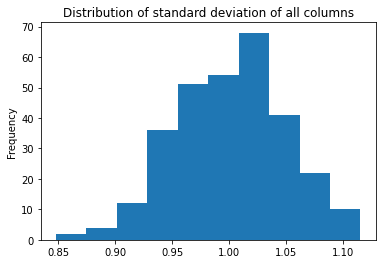

In [17]:
df_train[df_train.columns[2:]].std().plot(kind='hist');
plt.title('Distribution of standard deviation of all columns')

Text(0.5, 1.0, 'Distribution of mean of all columns')

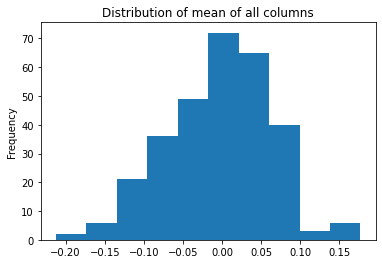

In [18]:
df_train[df_train.columns[2:]].mean().plot(kind='hist');
plt.title('Distribution of mean of all columns')

Distributions of random columns


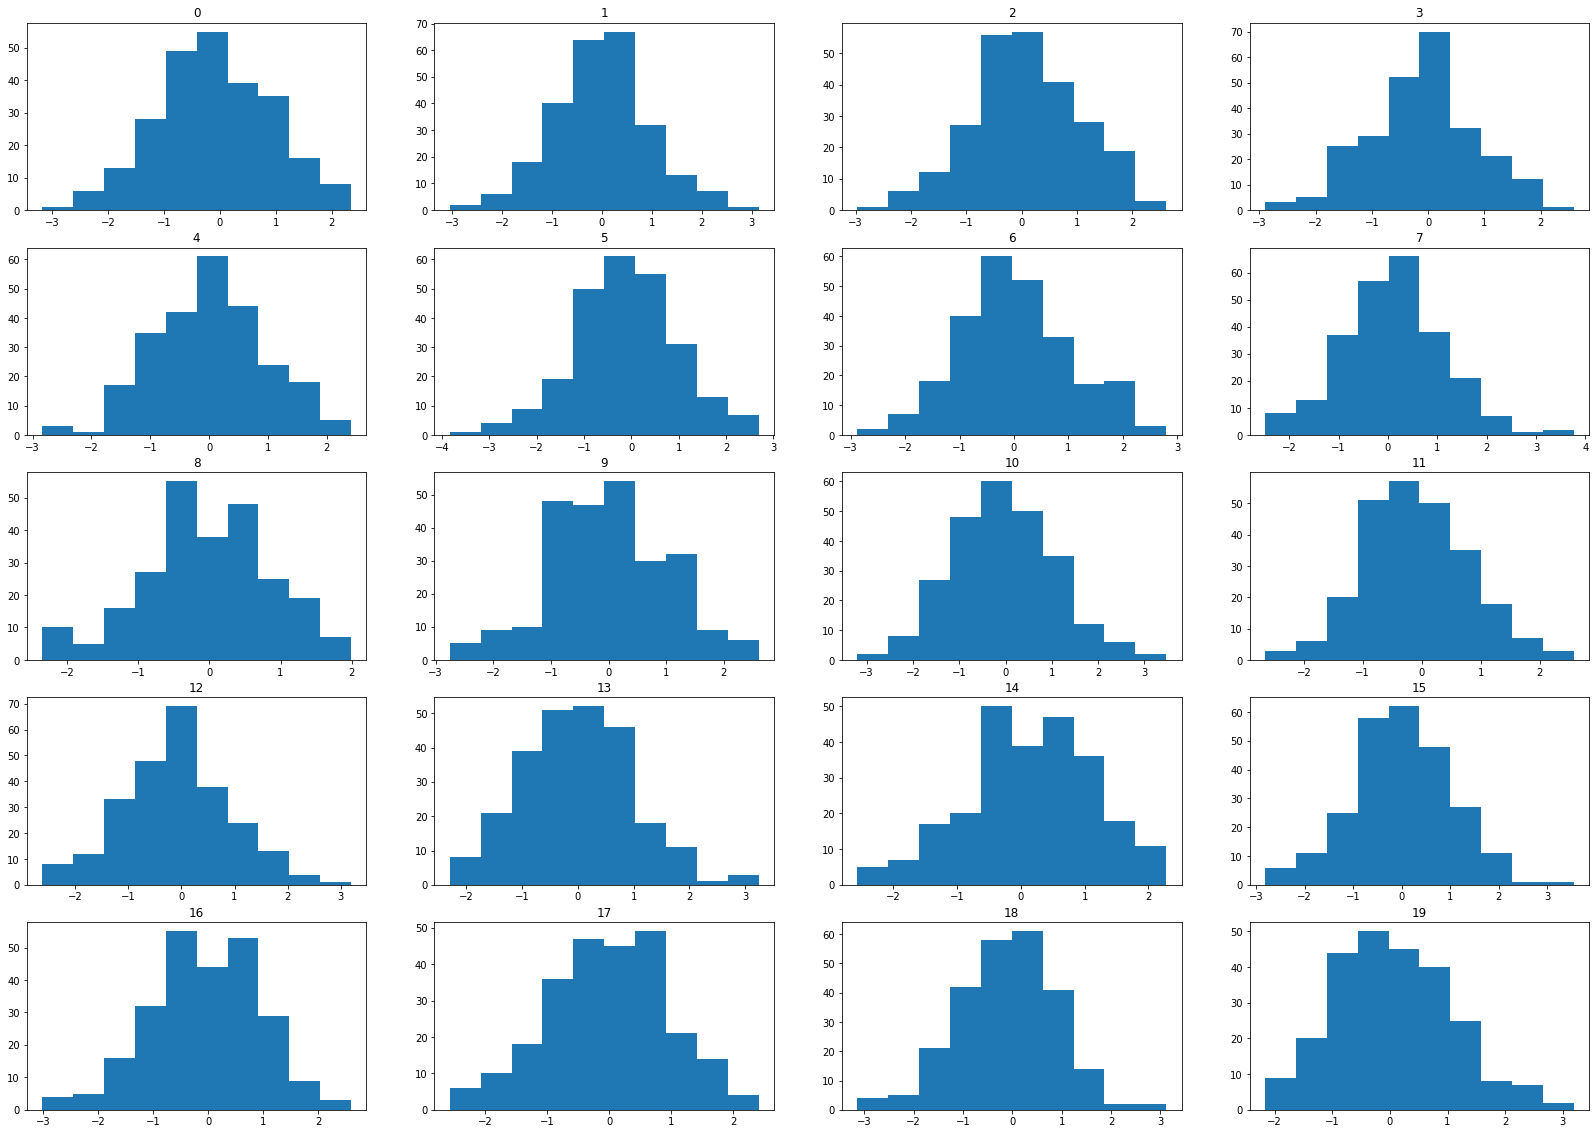

In [20]:
print('Distributions of random columns')
plt.figure(figsize=(28, 20))
for i, col in enumerate(list(df_train.columns)[2:22]):
    plt.subplot(5, 4, i + 1)
    plt.hist(df_train[col])
    plt.title(col)

Index(['target', '127', '18', '241', '3', '66', '93', '260', '213', '167',
       '175', '261', '278', '211', '151'],
      dtype='object')


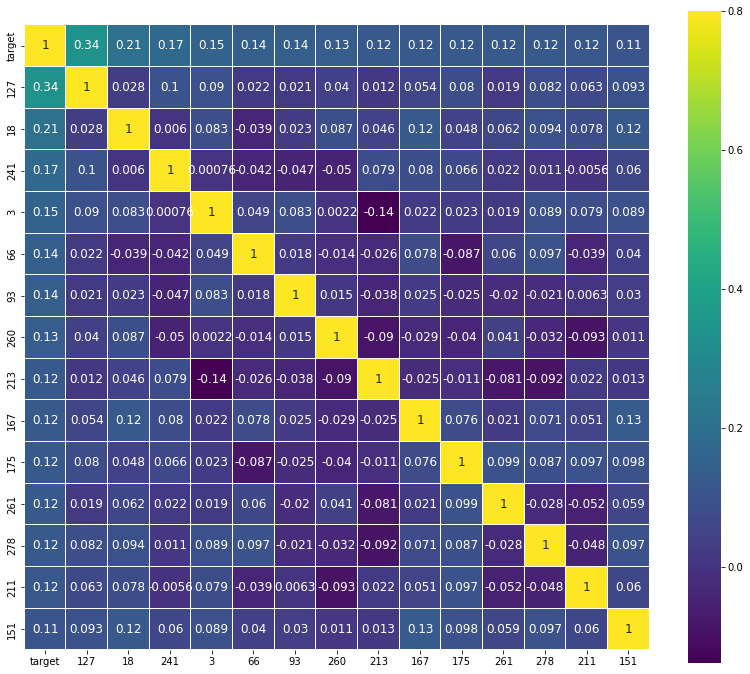

In [21]:
correlation = df_train.corr()
k= 15
cols = correlation.nlargest(k,'target')['target'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Text(0.5, 1.0, 'Distribution of standard deviation of all columns for those with class 1 as label')

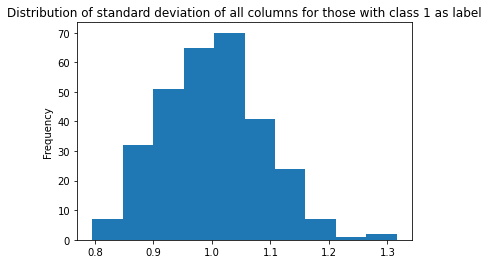

In [28]:
#dataframe with class 1
train_1=df_train[df_train['target']==1]
train_1[train_1.columns[2:]].std().plot(kind='hist');
plt.title('Distribution of standard deviation of all columns for those with class 1 as label')

Text(0.5, 1.0, 'Distribution of standard deviation of all columns for those with class 0 as label')

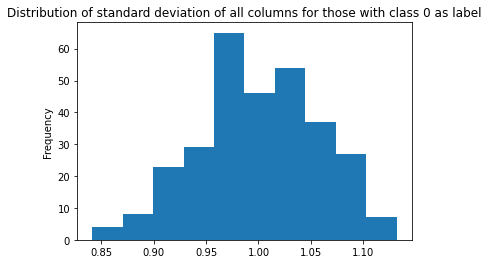

In [29]:
#dataframe with class 0
train_0=df_train[df_train['target']==0]
train_0[train_0.columns[2:]].std().plot(kind='hist');
plt.title('Distribution of standard deviation of all columns for those with class 0 as label')

Text(0.5, 1.0, 'Distribution of mean of all columns for those with class 1 as label')

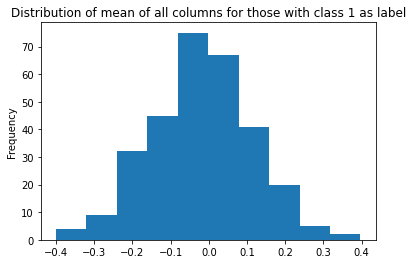

In [30]:
#dataframe with class 1
train_1=df_train[df_train['target']==1]
train_1[train_1.columns[2:]].mean().plot(kind='hist');
plt.title('Distribution of mean of all columns for those with class 1 as label')

Text(0.5, 1.0, 'Distribution of mean of all columns for those with class 0 as label')

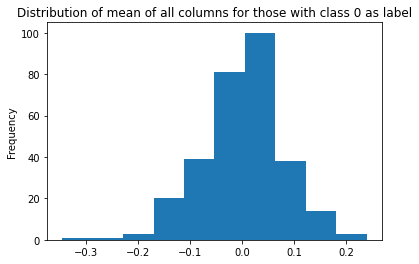

In [31]:
#dataframe with class 0
train_0=df_train[df_train['target']==0]
train_0[train_0.columns[2:]].mean().plot(kind='hist');
plt.title('Distribution of mean of all columns for those with class 0 as label')

# Observations

1. We have 250 train samples and 19750 test samples and we need to perform binary classification , target is the binary variable.
2. We have no categorical features.
3. We dont have any null values in train or test samples.
4. Dataset is slightly imbalanced.
5. Distribution of features is almost same.
6. std of features around 1.
7. mean of features is around 0.
8. There is not much correlation between features.Max correlation is less than 0.3. So we need not drop any features. We can try to check if these lightly correlated features are having any effect by checking score with & without dropping them.